In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('/Users/student/Desktop/2020041/titanic dataset/train.csv')
df2 = pd.read_csv('/Users/student/Desktop/2020041/titanic dataset/test.csv')
df3 = pd.read_csv('/Users/student/Desktop/2020041/titanic dataset/gender_submission.csv')

df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df1 = df1.drop(['Name', 'Ticket'], axis = 1)
df2 = df2.drop(['Name', 'Ticket'], axis = 1)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [3]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [4]:
df1['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [5]:
df1['Cabin'].isna().sum()

687

In [6]:
df1 = df1.drop('Cabin', axis = 1)
df1 = df1.drop('PassengerId', axis = 1)
df2 = df2.drop('Cabin', axis = 1)
df2 = df2.drop('PassengerId', axis = 1)

In [7]:
df1['Embarked'].isna().sum()

2

In [8]:
df1.fillna('S', inplace = True)
df2.fillna('S', inplace = True)

/var/folders/jz/gyvqtrhj3r95c8wrv1v_mcpm0000gn/T/ipykernel_12255/3369869873.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'S' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('S', inplace = True)
/var/folders/jz/gyvqtrhj3r95c8wrv1v_mcpm0000gn/T/ipykernel_12255/3369869873.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'S' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.fillna('S', inplace = True)


In [9]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,S,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
for i in df1.columns:
    print(i, df1[i].isna().sum())

Survived 0
Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Fare 0
Embarked 0


In [11]:
le = LabelEncoder()
df1['Embarked'] = le.fit_transform(df1['Embarked'])
df1['Sex'] = le.fit_transform(df1['Sex'])
df2['Embarked'] = le.fit_transform(df2['Embarked'])
df2['Sex'] = le.fit_transform(df2['Sex'])
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,S,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [12]:
df1.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,2.000000


In [13]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,S,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [14]:
for i in df1.columns:
    print(i, df1[i].value_counts())

Survived Survived
0    549
1    342
Name: count, dtype: int64
Pclass Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex Sex
1    577
0    314
Name: count, dtype: int64
Age Age
S       177
24.0     30
22.0     27
18.0     26
28.0     25
       ... 
36.5      1
55.5      1
0.92      1
23.5      1
74.0      1
Name: count, Length: 89, dtype: int64
SibSp SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
Embarked Embarked
2    646
0    168
1     77
Name: count, dtype: int64


In [15]:
for i in df2.columns:
    print(df2[i].value_counts())

Pclass
3    218
1    107
2     93
Name: count, dtype: int64
Sex
1    266
0    152
Name: count, dtype: int64
Age
S       86
24.0    17
21.0    17
22.0    16
30.0    15
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 80, dtype: int64
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
Fare
7.7500     21
26.0000    19
8.0500     17
13.0000    17
10.5000    11
           ..
8.7125      1
7.8208      1
8.5167      1
78.8500     1
22.3583     1
Name: count, Length: 170, dtype: int64
Embarked
2    270
0    102
1     46
Name: count, dtype: int64


In [16]:
count = 1
for i in df2['Fare']:
    if i == 'S':
        print(count, i)
        
    count += 1 

153 S


In [17]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,S,0,0,8.05,2
414,1,0,39.0,0,0,108.9,0
415,3,1,38.5,0,0,7.25,2
416,3,1,S,0,0,8.05,2


/var/folders/jz/gyvqtrhj3r95c8wrv1v_mcpm0000gn/T/ipykernel_12255/3556192312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Age'] != 'S']['Age'])
/Users/student/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/student/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

<Axes: xlabel='Age', ylabel='Density'>

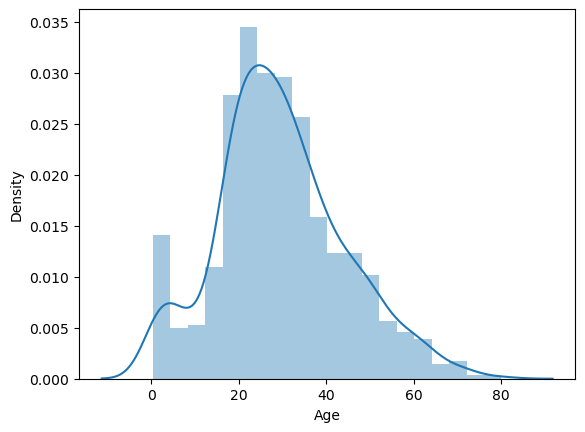

In [18]:
sns.distplot(df1[df1['Age'] != 'S']['Age'])

In [19]:
df1['Age'].replace('S', df1[df1['Age'] != 'S']['Age'].mean(), inplace = True)
df2['Age'].replace('S', df2[df2['Age'] != 'S']['Age'].mean(), inplace = True)
df2['Fare'].replace('S', df2[df2['Fare'] != 'S']['Fare'].mean(), inplace = True)
df2['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 80, dtype: int64

In [20]:
df1.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.167675
Name: Survived, dtype: float64

In [21]:
X_train_feat = np.array([df1['Parch'], df1['Fare']])
X_train_feat = X_train_feat.T
X_train = np.array([df1['Pclass'], df1['Sex'], df1['Age'], df1['SibSp'], df1['Parch'], df1['Fare'], df1['Embarked']])
X_train = X_train.T
X_train_feat.shape

(891, 2)

In [22]:
X_train.shape

(891, 7)

In [23]:
x_test_feat = np.array([df2['Parch'], df2['Fare']])
x_test_feat = x_test_feat.T
x_test_feat.shape

(418, 2)

In [24]:
x_test = np.array([df2['Pclass'], df2['Sex'], df2['Age'], df2['SibSp'], df2['Parch'], df2['Fare'], df2['Embarked']])
x_test = x_test.T
x_test.shape

(418, 7)

In [25]:
Y_train = np.array([df1['Survived']])
Y_train = Y_train.T
Y_train.shape

(891, 1)

In [26]:
y_test = np.array([df3['Survived']])
y_test = y_test.T
y_test.shape

(418, 1)

# Feature Selected Logistic Regression

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


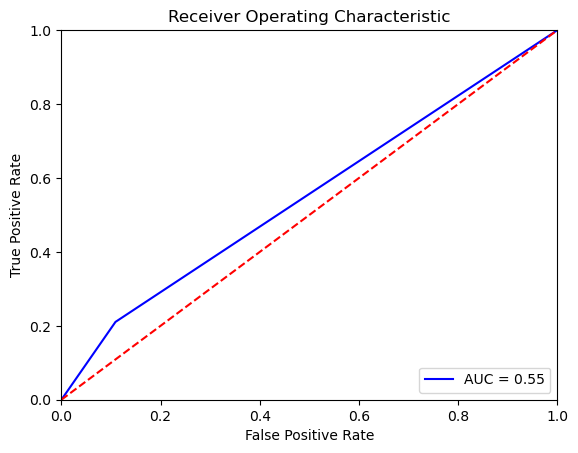

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       266
           1       0.52      0.21      0.30       152

    accuracy                           0.64       418
   macro avg       0.59      0.55      0.53       418
weighted avg       0.61      0.64      0.59       418



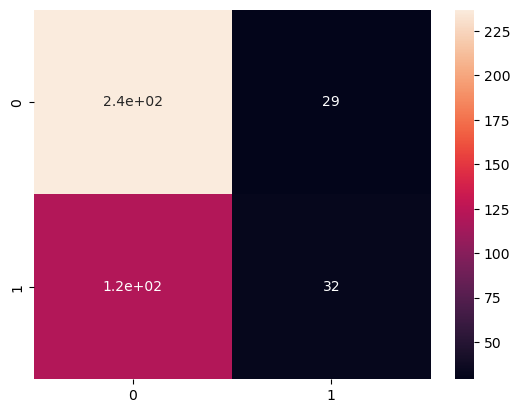

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

clf = LogisticRegression(random_state=0)

clf.fit(X_train_feat, Y_train)

predictions_feat = clf.predict(x_test_feat)

probs = clf.predict_proba(x_test_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_feat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cf_matrix = confusion_matrix(y_test, predictions_feat)

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions_feat))

# All Features Logistic Regression

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


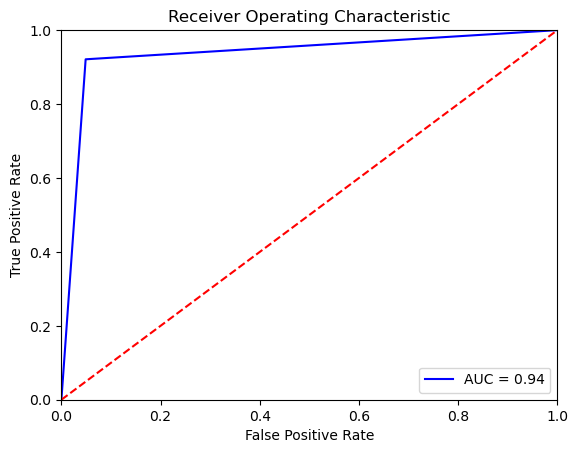

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.92      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



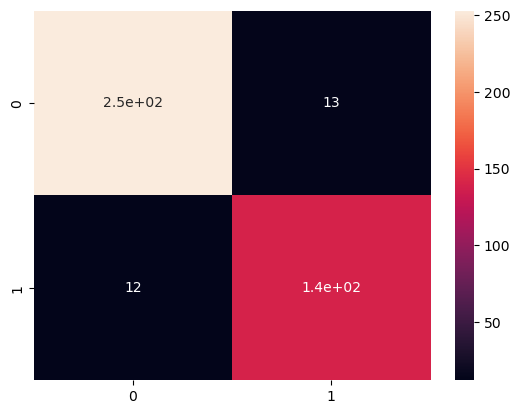

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train, Y_train)

predictions = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, predictions)

probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot = True)

print(classification_report(y_test, predictions))

# Feature Selected Decision Trees

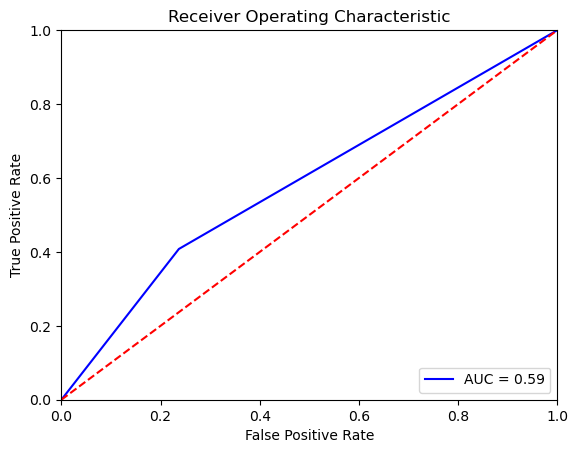

              precision    recall  f1-score   support

           0       0.69      0.76      0.73       266
           1       0.50      0.41      0.45       152

    accuracy                           0.63       418
   macro avg       0.59      0.59      0.59       418
weighted avg       0.62      0.63      0.62       418



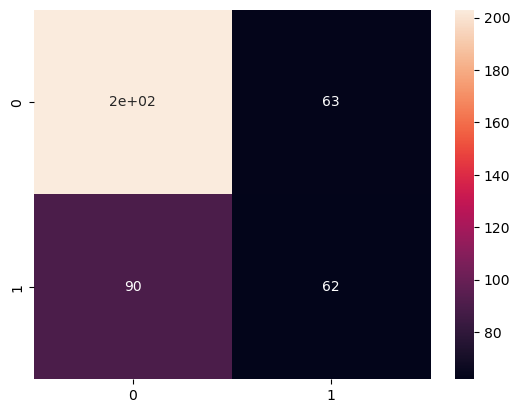

In [57]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train_feat, Y_train)

predictions_feat = clf.predict(x_test_feat)

cf_matrix = confusion_matrix(y_test, predictions_feat)

probs = clf.predict_proba(x_test_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_feat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions_feat))

# All Features Decision Trees

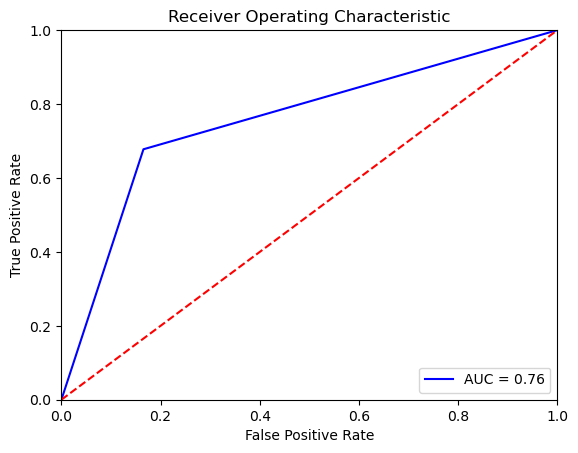

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       266
           1       0.70      0.68      0.69       152

    accuracy                           0.78       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.78      0.78      0.78       418



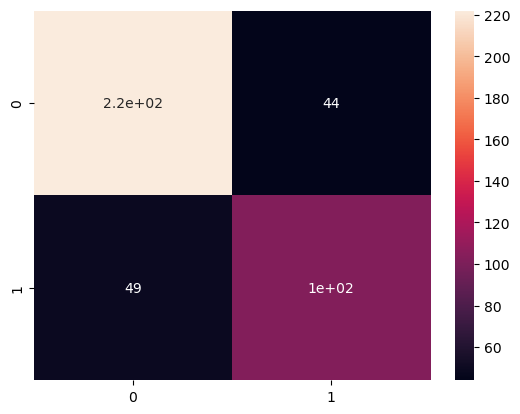

In [65]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

predictions = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, predictions)

probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions))

# Features Selected Random Forest Classifier

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


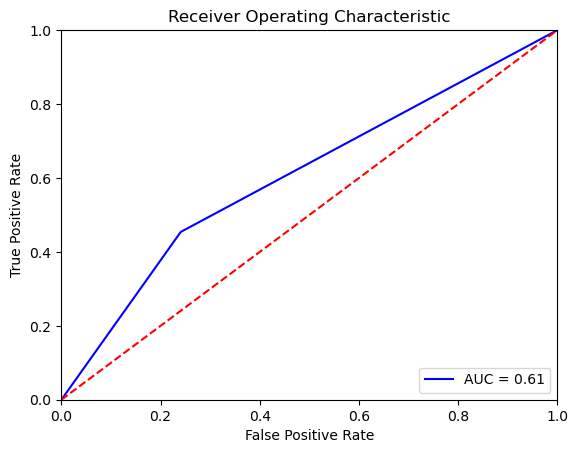

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       266
           1       0.52      0.45      0.48       152

    accuracy                           0.65       418
   macro avg       0.61      0.61      0.61       418
weighted avg       0.64      0.65      0.64       418



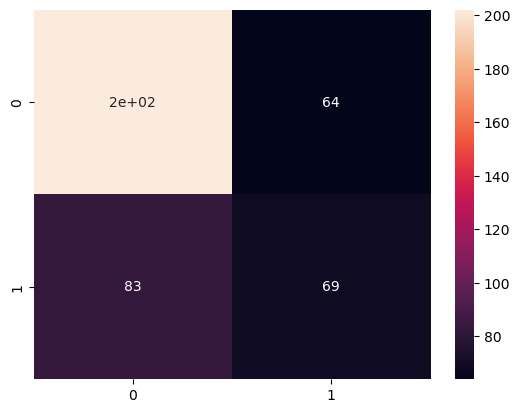

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=15, n_estimators = 100)

clf.fit(X_train_feat, Y_train)

predictions_feat = clf.predict(x_test_feat)

cf_matrix = confusion_matrix(y_test, predictions_feat)

probs = clf.predict_proba(x_test_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_feat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions_feat))

# All Features Random Forest Classifier

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


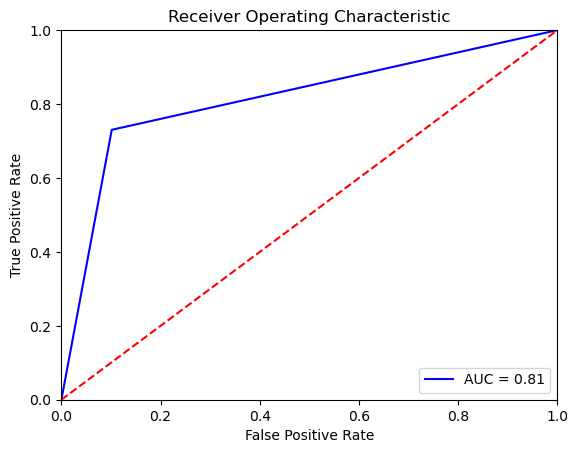

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       266
           1       0.80      0.73      0.77       152

    accuracy                           0.84       418
   macro avg       0.83      0.81      0.82       418
weighted avg       0.84      0.84      0.84       418



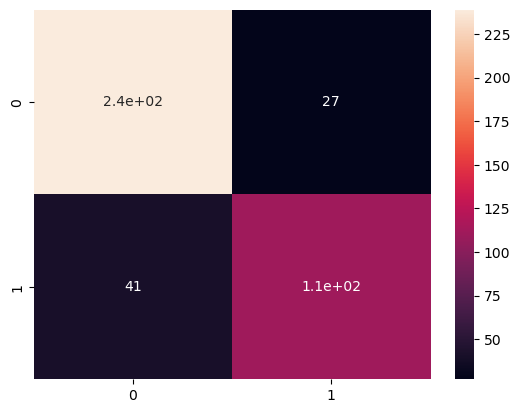

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=15, n_estimators = 100)

clf.fit(X_train, Y_train)

predictions = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, predictions)

probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions))

# Features Selected KNN

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


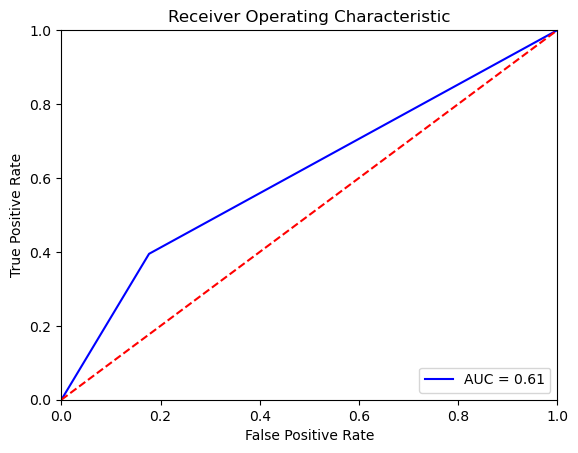

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       266
           1       0.56      0.39      0.46       152

    accuracy                           0.67       418
   macro avg       0.63      0.61      0.61       418
weighted avg       0.65      0.67      0.65       418



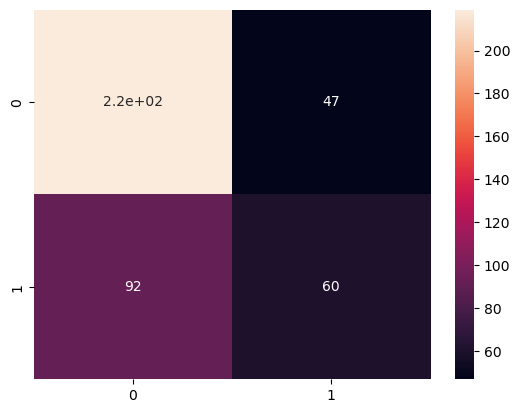

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train_feat, Y_train)

predictions_feat = clf.predict(x_test_feat)

cf_matrix = confusion_matrix(y_test, predictions_feat)

probs = clf.predict_proba(x_test_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_feat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions_feat))

# All Features KNN

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


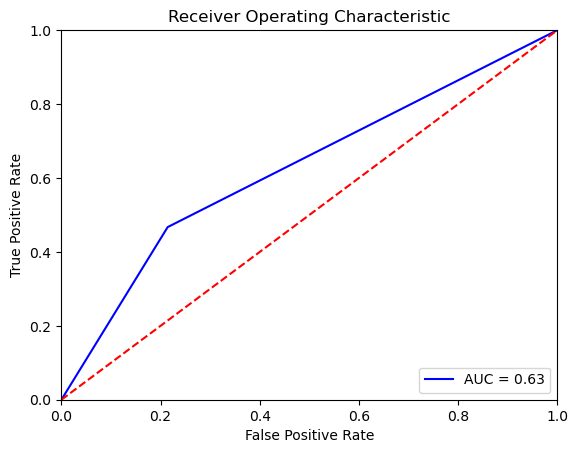

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       266
           1       0.55      0.47      0.51       152

    accuracy                           0.67       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.66      0.67      0.66       418



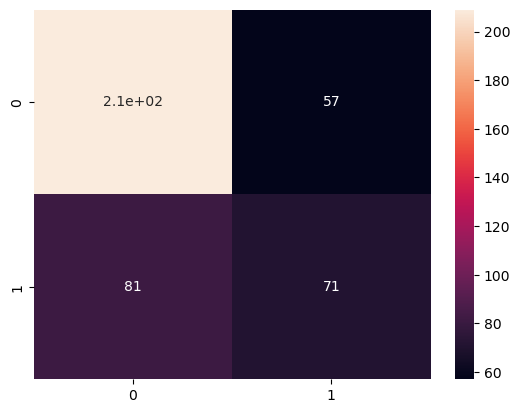

In [63]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train, Y_train)

predictions = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, predictions)

probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions))

# Features Selected SVC

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


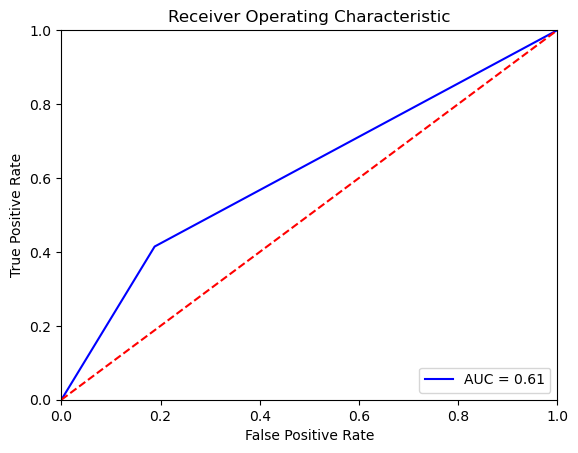

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       266
           1       0.56      0.41      0.48       152

    accuracy                           0.67       418
   macro avg       0.63      0.61      0.62       418
weighted avg       0.65      0.67      0.65       418



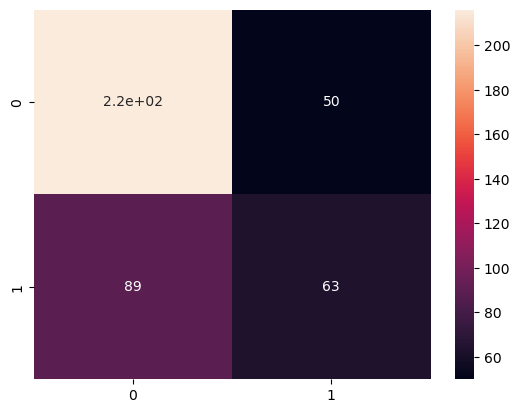

In [61]:
from sklearn.svm import SVC

clf = SVC(gamma = 'auto', probability = True)

clf.fit(X_train_feat, Y_train)

predictions_feat = clf.predict(x_test_feat)

cf_matrix = confusion_matrix(y_test, predictions_feat)

probs = clf.predict_proba(x_test_feat)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_feat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions_feat))

# All Features SVC

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


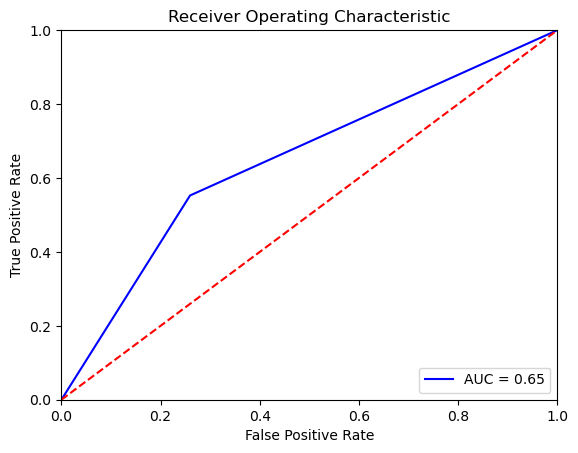

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       266
           1       0.55      0.55      0.55       152

    accuracy                           0.67       418
   macro avg       0.65      0.65      0.65       418
weighted avg       0.67      0.67      0.67       418



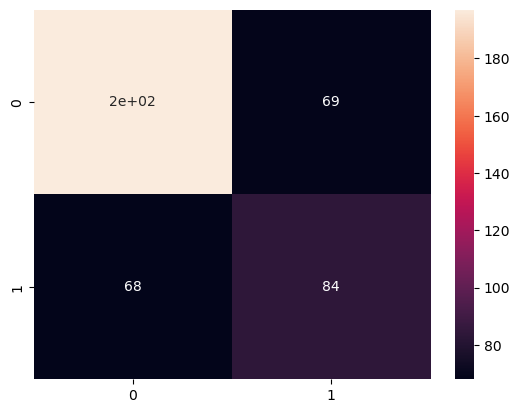

In [62]:
from sklearn.svm import SVC

clf = SVC(gamma = 'auto', probability = True)

clf.fit(X_train, Y_train)

predictions = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, predictions)

probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, predictions))